In [17]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import os

data = 'balanced_05_vel10_pringles_amax_12_4/'
path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/csv_data/' + data
save_image_path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/images/' + data

save_flag = False
cut_data = True

if not os.path.exists(save_image_path):
    os.makedirs(save_image_path)

### CSV's available
# control_ref.csv
# control_sent.csv
# desired_position.csv
# desired_velocity.csv
# orientation_optitrack.csv
# pitch_roll_crazyflie.csv
# position_gaussian_error.csv
# position_kalman.csv
# position_optitrack.csv
# reference_vel.csv
# thrust_crazyflie.csv
# time.csv
# vel_crazyflie.csv
# vel_kalmam.csv
# vel_optitrack.csv
# yaw_angle_crazyflie.csv
# z_crazyflie.csv

# Load the data from CSV files
time = os.path.join(path, 'time.csv')

### Position
desired_position_path = os.path.join(path, 'desired_position.csv')
position_optitrack_path = os.path.join(path, 'position_optitrack.csv')
position_kalman_path = os.path.join(path, 'position_kalman.csv')
position_gaussian_error_path = os.path.join(path, 'position_gaussian_error.csv')

### Velocity
desired_velocity_path = os.path.join(path, 'desired_velocity.csv')
vel_optitrack_path = os.path.join(path, 'vel_optitrack.csv')
vel_kalman_path = os.path.join(path, 'vel_kalmam.csv')
vel_crazyflie_path = os.path.join(path, 'vel_crazyflie.csv')

### Orientation
orientation_optitrack_path = os.path.join(path, 'orientation_optitrack.csv')
yaw_angle_crazyflie_path = os.path.join(path, 'yaw_angle_crazyflie.csv')

# Load the data from CSV files
time = pd.read_csv(time)
desired_position = pd.read_csv(desired_position_path)
position_optitrack = pd.read_csv(position_optitrack_path)
position_kalman = pd.read_csv(position_kalman_path)
position_gaussian_error = pd.read_csv(position_gaussian_error_path)
desired_velocity = pd.read_csv(desired_velocity_path)
vel_optitrack = pd.read_csv(vel_optitrack_path)
vel_kalman = pd.read_csv(vel_kalman_path)
vel_crazyflie = pd.read_csv(vel_crazyflie_path)

orientation_optitrack = pd.read_csv(orientation_optitrack_path)
yaw_crazyflie = pd.read_csv(yaw_angle_crazyflie_path)

# Tranforming the data into numpy arrays
time = time.values
desired_position = desired_position.values
position_optitrack = position_optitrack.values
position_kalman = position_kalman.values
position_gaussian_error = position_gaussian_error.values
desired_velocity = desired_velocity.values
vel_optitrack_world= vel_optitrack.values
vel_kalman_body = vel_kalman.values
vel_crazyflie_world = vel_crazyflie.values
orientation_optitrack = orientation_optitrack.values
yaw_crazyflie = np.deg2rad(yaw_crazyflie.values)

# ## Limit the data between 5 and 25 seconds
if cut_data:
    start = 0
    end = 50

    len_time = len(time)
    max_time = time[len_time-1]

    start_index = int(start*len_time/max_time)
    end_index = int(end*len_time/max_time)

    time = np.array(time[start_index:end_index])
    desired_position = np.array(desired_position[start_index:end_index])
    position_kalman = np.array(position_kalman[start_index:end_index])
    position_optitrack = np.array(position_optitrack[start_index:end_index])
    position_gaussian_error = np.array(position_gaussian_error[start_index:end_index])
    desired_velocity = np.array(desired_velocity[start_index:end_index])
    vel_optitrack_world = np.array(vel_optitrack_world[start_index:end_index])
    vel_kalman_body = np.array(vel_kalman_body[start_index:end_index])
    vel_crazyflie_world = np.array(vel_crazyflie_world[start_index:end_index])
    orientation_optitrack = np.array(orientation_optitrack[start_index:end_index])
    yaw_angle_crazyflie = np.array(yaw_crazyflie[start_index:end_index])

In [18]:
def rotation_body_to_world(orientation, vector):
    R = np.array([[np.cos(orientation) , -np.sin(orientation)], 
                  [np.sin(orientation) , np.cos(orientation)]])
    return np.dot(R, vector)

def rotation_world_to_body(orientation, vector):
    R = np.array([[np.cos(orientation) , np.sin(orientation)], 
                  [-np.sin(orientation), np.cos(orientation)]])
    return np.dot(R, vector)

In [19]:
# ### Rotation matricies
# quaternion = [x, y, z, w]  # Replace these with your actual quaternion values

# # Create a rotation object from the quaternion
# rotation = R.from_quat(quaternion)

# # Convert the quaternion to Euler angles (in radians)
# euler_angles_radians = rotation.as_euler('xyz', degrees=False)
orientation_optitrack_rad = np.array([R.from_quat(orientation).as_euler('xyz', degrees=False) for orientation in orientation_optitrack])

vel_kalman_world = np.zeros((len(time), 3))
vel_optitrack_body = np.zeros((len(time), 3))
vel_crazyflie_body = np.zeros((len(time), 3))

for i in range(len(time)):
    vel_crazyflie_body[i, 0:2] = rotation_world_to_body(yaw_crazyflie[i,0], vel_crazyflie_world[i, 0:2])
    vel_crazyflie_body[i, 2] = vel_crazyflie_world[i, 2]

    vel_optitrack_body[i, 0:2] = rotation_world_to_body(orientation_optitrack_rad[i, 2], vel_optitrack_world[i, 0:2])
    vel_optitrack_body[i, 2] = vel_optitrack_world[i, 2]

    vel_kalman_world[i, 0:2] = rotation_body_to_world(yaw_crazyflie[i, 0], vel_kalman_body[i, 0:2])
    vel_kalman_world[i, 2] = vel_kalman_body[i, 2]

# Position

## Kalman vs Optitrack

### X

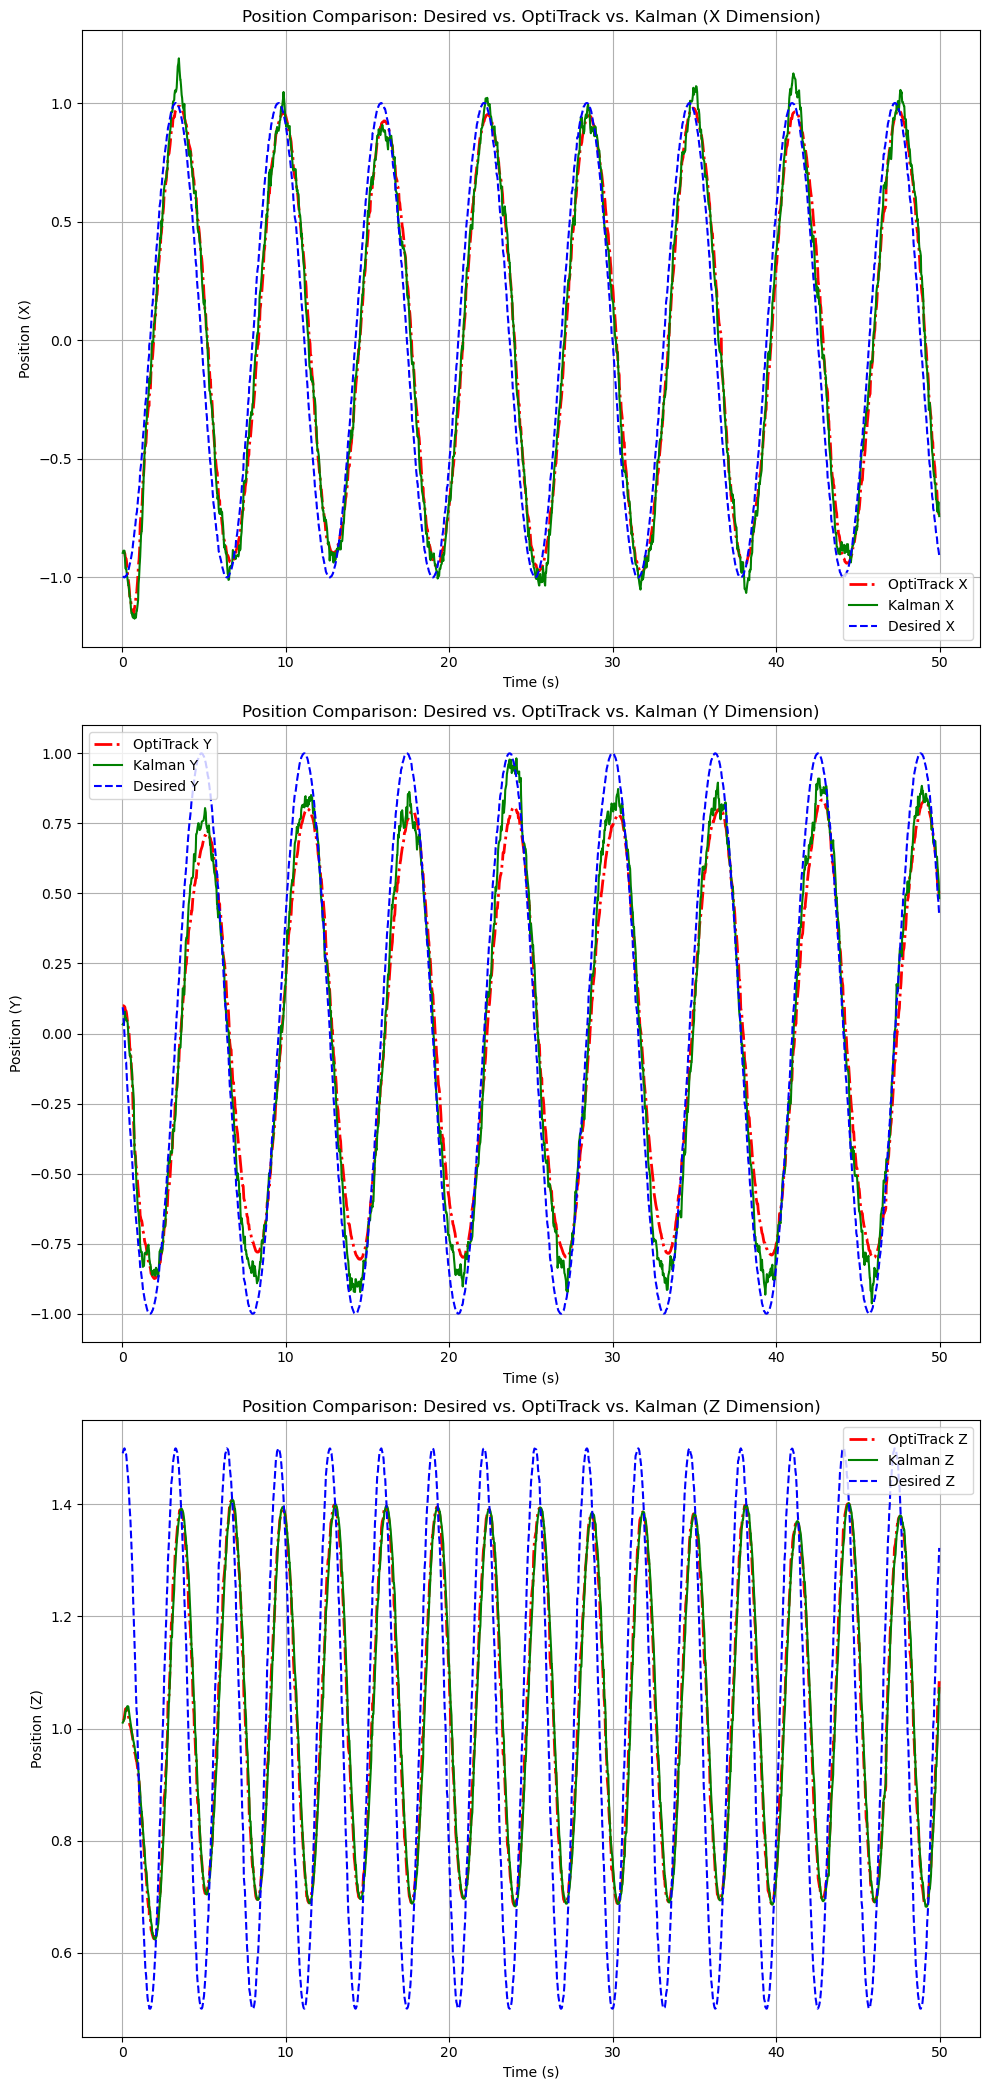

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10, 21))  # 3 rows, 1 column

# X Dimension
axs[0].plot(time, position_optitrack[:, 0], label='OptiTrack X', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[0].plot(time, position_kalman[:, 0], label='Kalman X', linestyle='-', color='green')
axs[0].plot(time, desired_position[:, 0], label='Desired X', linestyle='--', color='blue')
axs[0].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X Dimension)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (X)')
axs[0].legend()
axs[0].grid(True)

# Y Dimension
axs[1].plot(time, position_optitrack[:, 1], label='OptiTrack Y', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[1].plot(time, position_kalman[:, 1], label='Kalman Y', linestyle='-', color='green')
axs[1].plot(time, desired_position[:, 1], label='Desired Y', linestyle='--', color='blue')
axs[1].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (Y Dimension)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Position (Y)')
axs[1].legend()
axs[1].grid(True)

# Z Dimension
axs[2].plot(time, position_optitrack[:, 2], label='OptiTrack Z', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[2].plot(time, position_kalman[:, 2], label='Kalman Z', linestyle='-', color='green')
axs[2].plot(time, desired_position[:, 2], label='Desired Z', linestyle='--', color='blue')
axs[2].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (Z Dimension)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Position (Z)')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

if save_flag:
    vectorized_image_path = 'position_comparison.svg'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='svg')

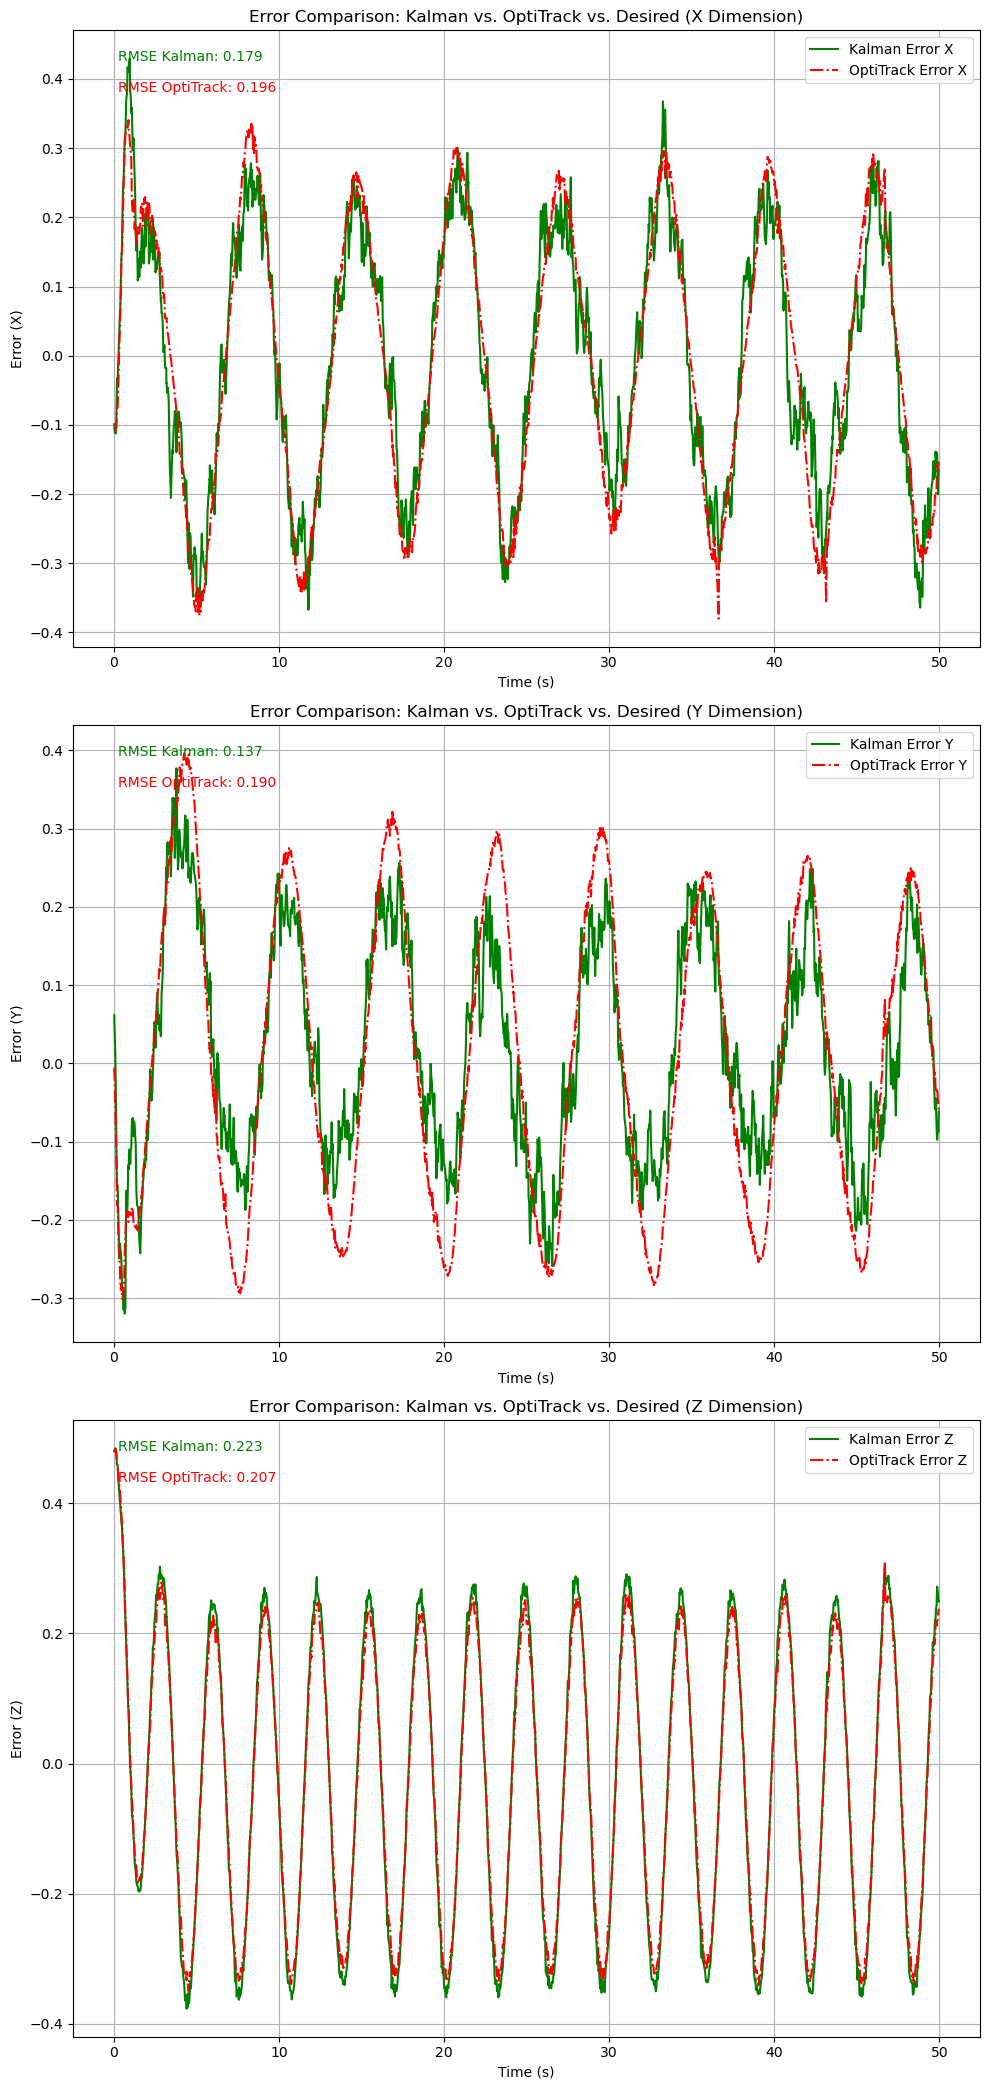

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculating errors
error_kalman = desired_position - position_kalman
error_optitrack = desired_position - position_optitrack

# Calculating RMSE for each dimension
rmse_kalman = [calculate_rmse(desired_position[:, i], position_kalman[:, i]) for i in range(3)]
rmse_optitrack = [calculate_rmse(desired_position[:, i], position_optitrack[:, i]) for i in range(3)]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 21))  # 3 rows, 1 column for X, Y, Z dimensions

dimensions = ['X', 'Y', 'Z']
for i in range(3):
    # Plotting the errors
    axs[i].plot(time, error_kalman[:, i], label=f'Kalman Error {dimensions[i]}', linestyle='-', color='green')
    axs[i].plot(time, error_optitrack[:, i], label=f'OptiTrack Error {dimensions[i]}', linestyle='-.', color='red')
    
    # Annotating RMSE on the plot
    axs[i].annotate(f'RMSE Kalman: {rmse_kalman[i]:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='green')
    axs[i].annotate(f'RMSE OptiTrack: {rmse_optitrack[i]:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='red')
    
    axs[i].set_title(f'Error Comparison: Kalman vs. OptiTrack vs. Desired ({dimensions[i]} Dimension)')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(f'Error ({dimensions[i]})')
    axs[i].grid(True)
    
    # Adjusting the legend location
    axs[i].legend(loc='upper right')

# Adjust layout to not overlap the subplots
plt.tight_layout()

# Show plot
plt.show()

# Assuming save_flag and save_image_path are defined
if save_flag:
    plt.savefig(os.path.join(save_image_path, 'error_comparison_rmse.svg'), format='svg')


## Kalman vs Optitrack with gaussian error

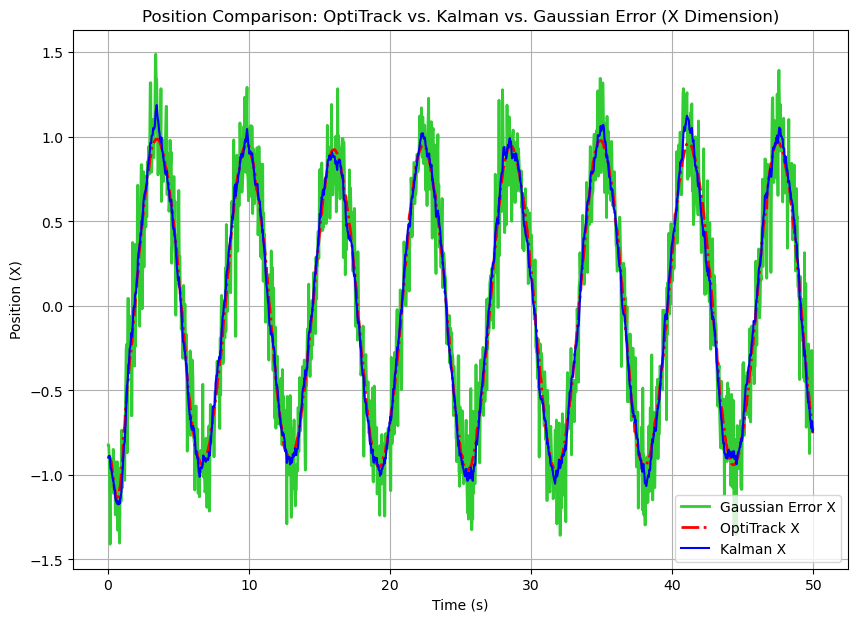

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(time, position_gaussian_error[:, 0], label='Gaussian Error X', linestyle='-', color='limegreen', linewidth=2)
plt.plot(time, position_optitrack[:, 0], label='OptiTrack X', linestyle='-.', markersize=4, color='red', alpha=1, linewidth=2)
plt.plot(time, position_kalman[:, 0], label='Kalman X', linestyle='-', color='blue')

plt.title('Position Comparison: OptiTrack vs. Kalman vs. Gaussian Error (X Dimension)')
plt.xlabel('Time (s)')
plt.ylabel('Position (X)')
plt.legend()
plt.grid(True)
plt.show()

if save_flag:
    vectorized_image_path = 'position_comparison_gaussian_error.svg'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='svg')

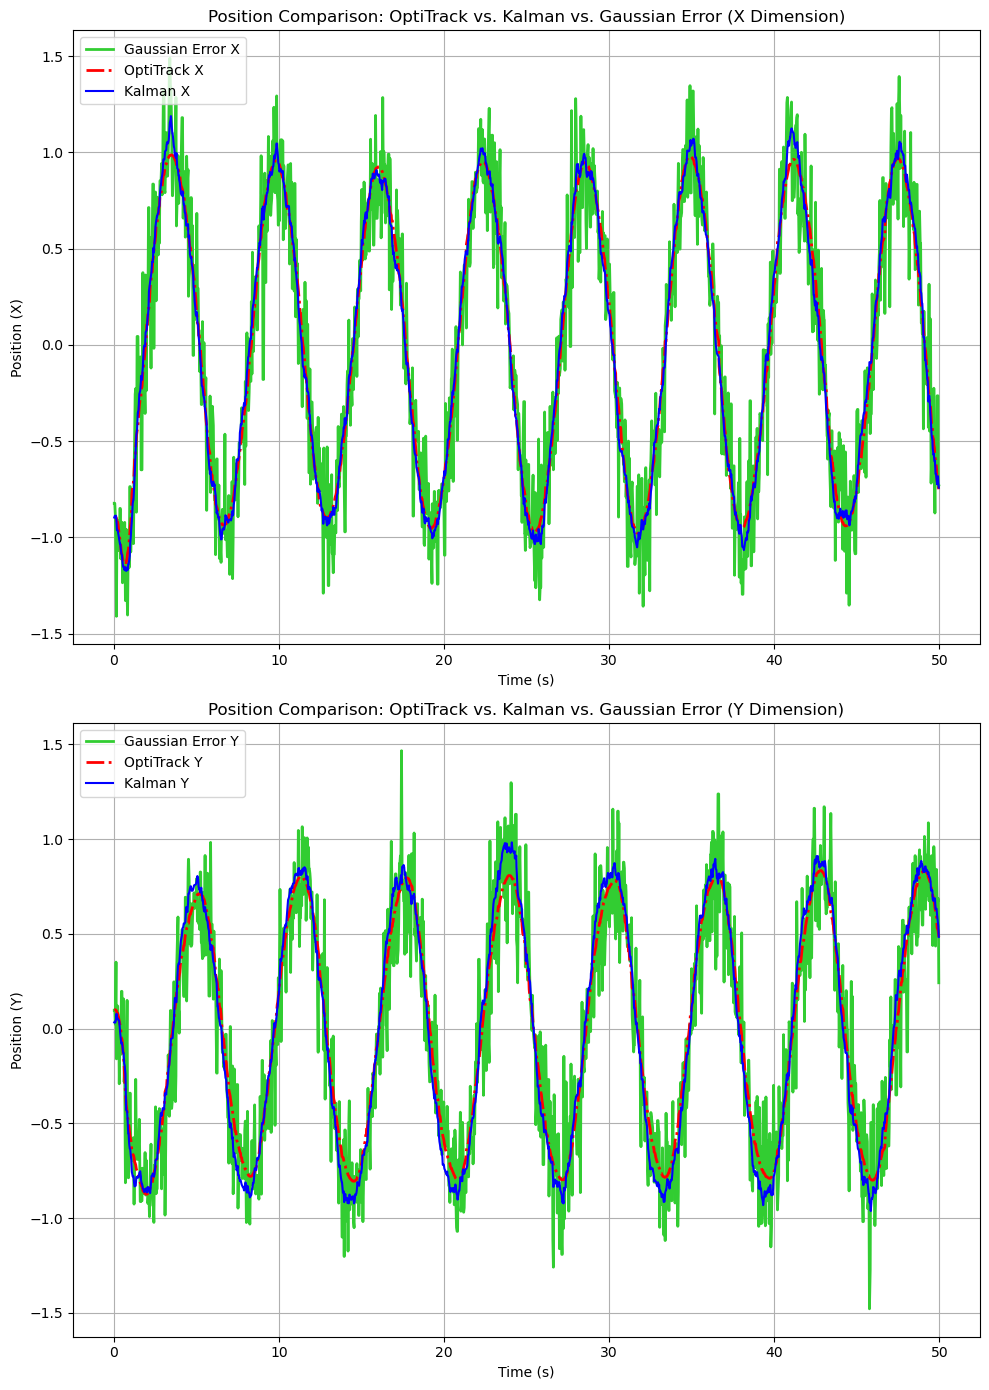

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10, 14))

dimensions = ['X', 'Y']

for i in range(2):
    axs[i].plot(time, position_gaussian_error[:, i], label=f'Gaussian Error {dimensions[i]}', linestyle='-', color='limegreen', linewidth=2)
    axs[i].plot(time, position_optitrack[:, i], label=f'OptiTrack {dimensions[i]}', linestyle='-.', markersize=4, color='red', alpha=1, linewidth=2)
    axs[i].plot(time, position_kalman[:, i], label=f'Kalman {dimensions[i]}', linestyle='-', color='blue')

    axs[i].set_title(f'Position Comparison: OptiTrack vs. Kalman vs. Gaussian Error ({dimensions[i]} Dimension)')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(f'Position ({dimensions[i]})')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)

# Adjust the layout so labels and titles do not overlap
plt.tight_layout()

# Show the plots
plt.show()

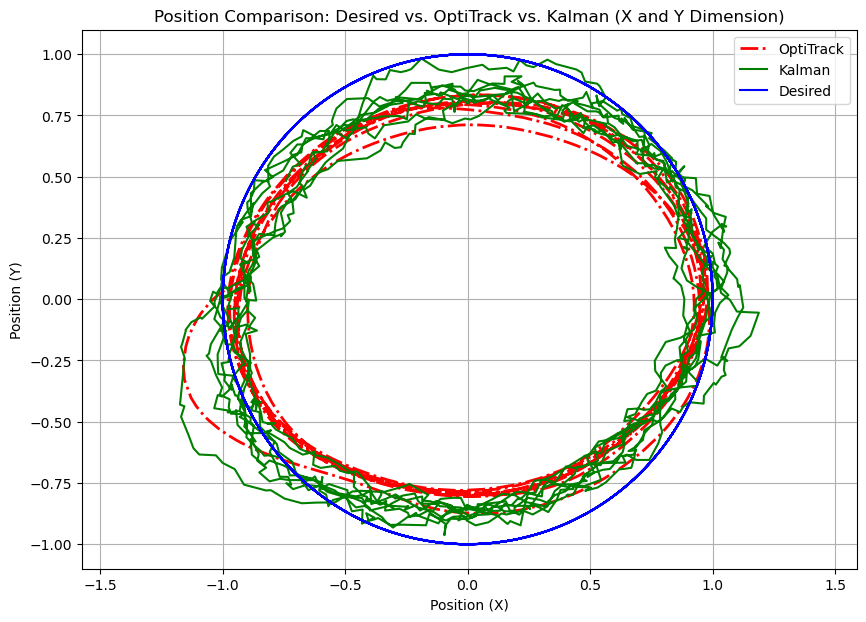

In [24]:
### plotting the x and y simultaniously

plt.figure(figsize=(10, 7))

plt.plot(position_optitrack[:, 0], position_optitrack[:, 1], label='OptiTrack', linestyle = '-.',markersize=4, color='red', alpha=1, linewidth=2)
plt.plot(position_kalman[:, 0], position_kalman[:, 1], label='Kalman', linestyle='-', color='green')
plt.plot(desired_position[:, 0], desired_position[:, 1], label='Desired', linestyle='-', color='blue')

plt.title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X and Y Dimension)')
plt.xlabel('Position (X)')
plt.ylabel('Position (Y)')
plt.legend()
plt.grid(True)

plt.axis('equal')
plt.show()

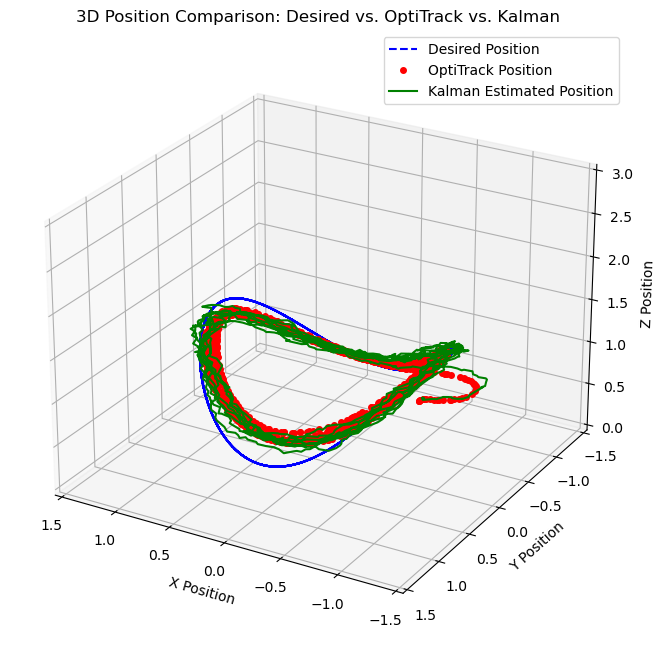

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D plot for position comparison
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.plot(desired_position[:, 0], desired_position[:, 1], desired_position[:, 2], label='Desired Position', linestyle='--', color='blue')
ax.plot(position_optitrack[:, 0], position_optitrack[:, 1], position_optitrack[:, 2], label='OptiTrack Position', marker='o', linestyle='', markersize=4, color='red')
ax.plot(position_kalman[:, 0], position_kalman[:, 1], position_kalman[:, 2], label='Kalman Estimated Position', linestyle='-', color='green')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('3D Position Comparison: Desired vs. OptiTrack vs. Kalman')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
ax.set_zlim(0, 3)

# Change point of view
ax.view_init(25, 120)

ax.legend()

plt.show()

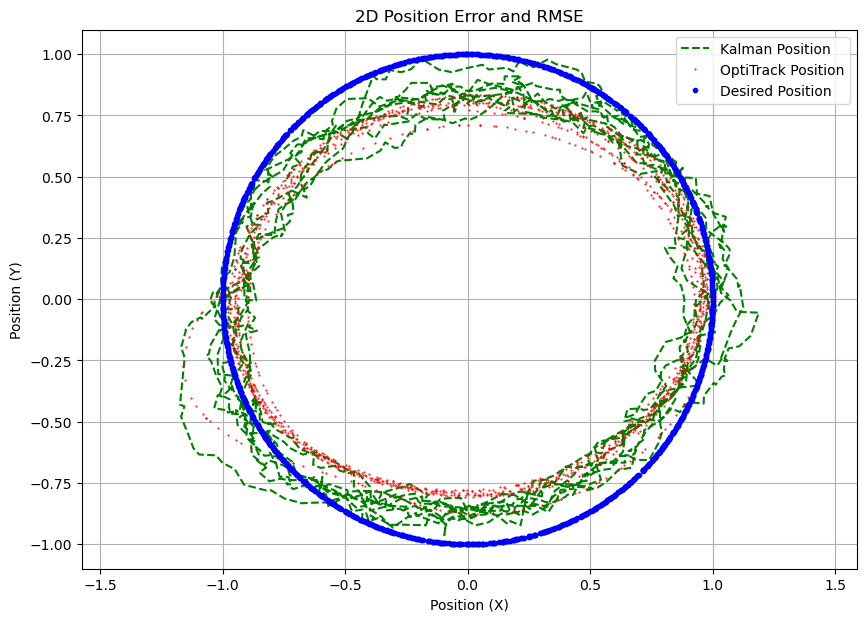

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse_2d(y_true, y_pred):
    return np.sqrt(np.mean(np.sum((y_true - y_pred) ** 2, axis=1)))

# Calculating 2D errors as Euclidean distances
error_kalman_2d = np.sqrt((position_kalman[:, 0] - desired_position[:, 0]) ** 2 + (position_kalman[:, 1] - desired_position[:, 1]) ** 2)
error_optitrack_2d = np.sqrt((position_optitrack[:, 0] - desired_position[:, 0]) ** 2 + (position_optitrack[:, 1] - desired_position[:, 1]) ** 2)

# Calculating RMSE for 2D (X and Y combined)
rmse_kalman_2d = calculate_rmse_2d(desired_position[:, :2], position_kalman[:, :2])
rmse_optitrack_2d = calculate_rmse_2d(desired_position[:, :2], position_optitrack[:, :2])

# Plotting the 2D position errors
plt.figure(figsize=(10, 7))

# # Error plot for Kalman
plt.plot(position_kalman[:, 0], position_kalman[:, 1], '--', color='green', label='Kalman Position')
# plt.quiver(position_kalman[:, 0], position_kalman[:, 1], 
#            desired_position[:, 0] - position_kalman[:, 0], desired_position[:, 1] - position_kalman[:, 1], 
#            angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5, width=0.005, label='Kalman Error')

# Error plot for OptiTrack
plt.plot(position_optitrack[:, 0], position_optitrack[:, 1], '.', color='red', label='OptiTrack Position', markersize=1)
# plt.quiver(position_optitrack[:, 0], position_optitrack[:, 1], 
#            desired_position[:, 0] - position_optitrack[:, 0], desired_position[:, 1] - position_optitrack[:, 1], 
#            angles='xy', scale_units='xy', scale=1, color='red', alpha=0.5, width=0.005, label='OptiTrack Error')

# Desired positions
plt.plot(desired_position[:, 0], desired_position[:, 1], '.', color='blue', label='Desired Position')

plt.title('2D Position Error and RMSE')
plt.xlabel('Position (X)')
plt.ylabel('Position (Y)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # This will ensure that one unit in X is the same as one unit in Y

plt.show()

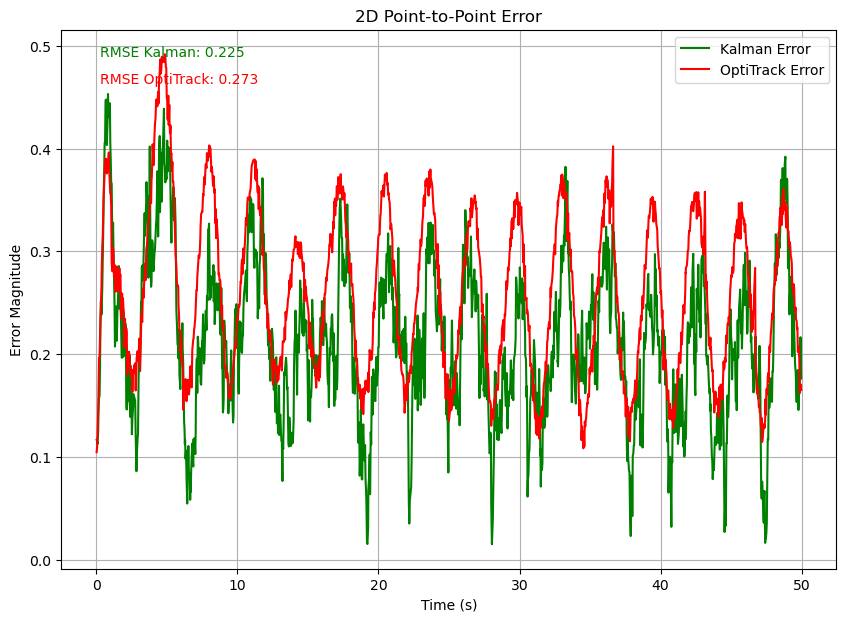

In [27]:
# Calculate the 2D point-to-point errors
point_to_point_error_kalman = np.linalg.norm(position_kalman[:, 0:2] - desired_position[:, 0:2], axis=1)
point_to_point_error_optitrack = np.linalg.norm(position_optitrack[:, 0:2] - desired_position[:, 0:2], axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_2d = np.sqrt(np.mean(point_to_point_error_kalman**2))
rmse_optitrack_2d = np.sqrt(np.mean(point_to_point_error_optitrack**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_kalman, label='Kalman Error', color='green')
plt.plot(time, point_to_point_error_optitrack, label='OptiTrack Error', color='red')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE Kalman: {rmse_kalman_2d:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE OptiTrack: {rmse_optitrack_2d:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='red')

plt.title('2D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel('Error Magnitude')
plt.legend()
plt.grid(True)
plt.show()

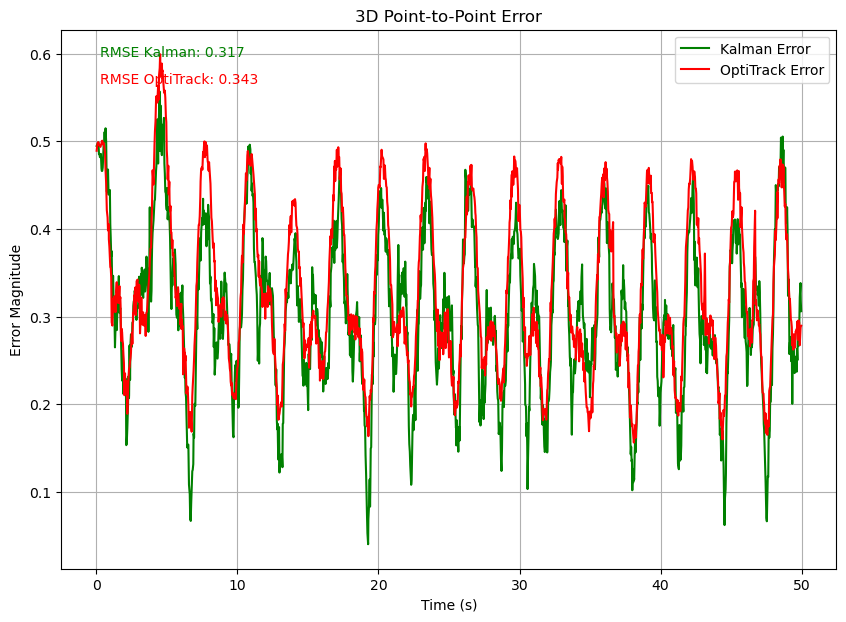

In [28]:
# Calculate the 3D point-to-point errors

point_to_point_error_kalman_3d = np.linalg.norm(position_kalman - desired_position, axis=1)
point_to_point_error_optitrack_3d = np.linalg.norm(position_optitrack - desired_position, axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_3d = np.sqrt(np.mean(point_to_point_error_kalman_3d**2))
rmse_optitrack_3d = np.sqrt(np.mean(point_to_point_error_optitrack_3d**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_kalman_3d, label='Kalman Error', color='green')
plt.plot(time, point_to_point_error_optitrack_3d, label='OptiTrack Error', color='red')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE Kalman: {rmse_kalman_3d:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE OptiTrack: {rmse_optitrack_3d:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='red')

plt.title('3D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel('Error Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Velocity

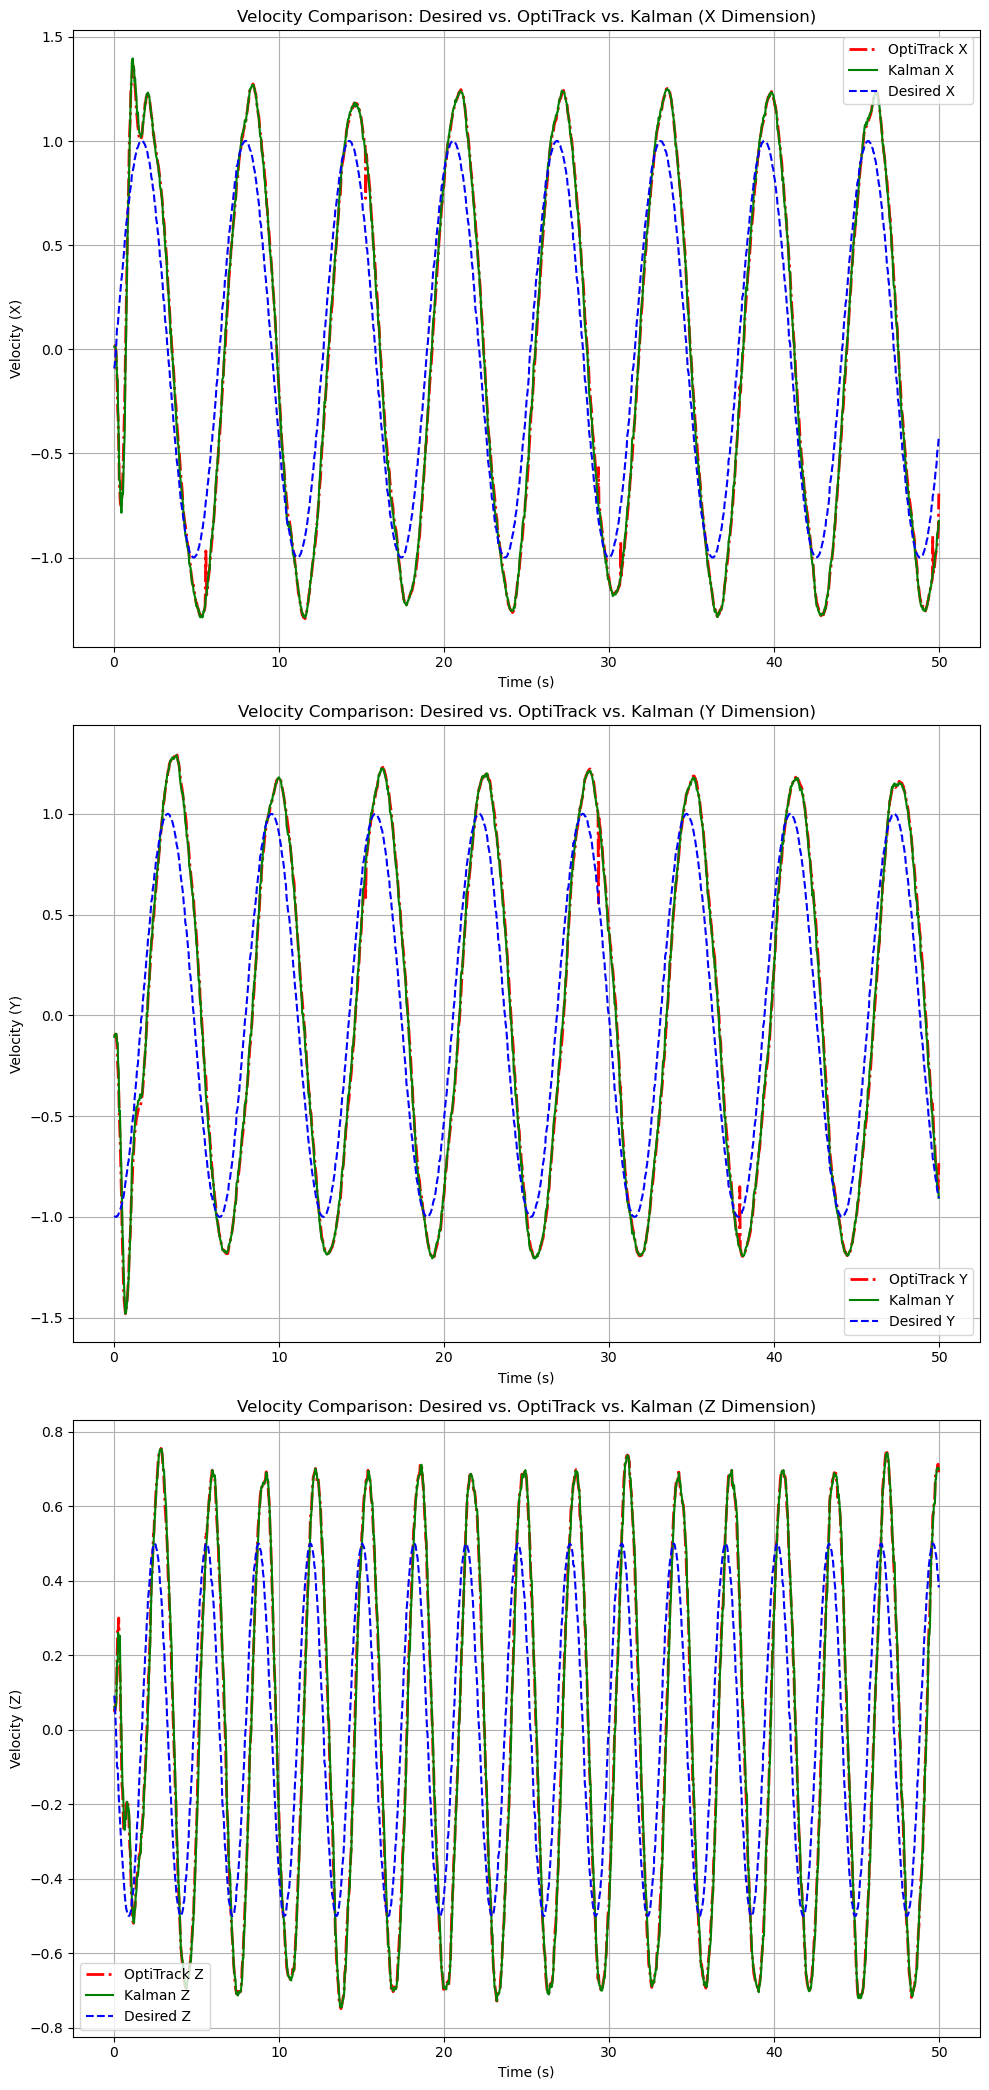

In [29]:
### Velocity tracking

fig, axs = plt.subplots(3, 1, figsize=(10, 21))  # 3 rows, 1 column

# X Dimension
axs[0].plot(time, vel_optitrack_world[:, 0], label='OptiTrack X', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[0].plot(time, vel_kalman_world[:, 0], label='Kalman X', linestyle='-', color='green')
axs[0].plot(time, desired_velocity[:, 0], label='Desired X', linestyle='--', color='blue')
axs[0].set_title('Velocity Comparison: Desired vs. OptiTrack vs. Kalman (X Dimension)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Velocity (X)')
axs[0].legend()
axs[0].grid(True)

# Y Dimension
axs[1].plot(time, vel_optitrack_world[:, 1], label='OptiTrack Y', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[1].plot(time, vel_kalman_world[:, 1], label='Kalman Y', linestyle='-', color='green')
axs[1].plot(time, desired_velocity[:, 1], label='Desired Y', linestyle='--', color='blue')
axs[1].set_title('Velocity Comparison: Desired vs. OptiTrack vs. Kalman (Y Dimension)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (Y)')
axs[1].legend()
axs[1].grid(True)

# Z Dimension
axs[2].plot(time, vel_optitrack_world[:, 2], label='OptiTrack Z', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[2].plot(time, vel_kalman_world[:, 2], label='Kalman Z', linestyle='-', color='green')
axs[2].plot(time, desired_velocity[:, 2], label='Desired Z', linestyle='--', color='blue')
axs[2].set_title('Velocity Comparison: Desired vs. OptiTrack vs. Kalman (Z Dimension)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Velocity (Z)')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
